In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Colorado_form_response.xlsx to Colorado_form_response.xlsx
Saving Colorado_Weather_Nov22.xlsx to Colorado_Weather_Nov22.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Colorado_form_response.xlsx']))
df

In [ ]:
df.describe

<bound method NDFrame.describe of         City  Avg_Temperature public_opinion      clothing  \
0   Colorado             44.8       moderate       t-shirt   
1   Colorado             48.3       moderate  full-sleeves   
2   Colorado             28.6           cold        jacket   
3   Colorado             24.0           cold        jacket   
4   Colorado             36.2           cold        jacket   
5   Colorado             32.4           cold        jacket   
6   Colorado             33.9           cold        jacket   
7   Colorado             36.3           cold        jacket   
8   Colorado             37.0           cold        jacket   
9   Colorado             27.4           cold        jacket   
10  Colorado             21.2           cold        jacket   
11  Colorado             27.8           cold        jacket   
12  Colorado             31.6           cold        jacket   
13  Colorado             18.9           cold        jacket   
14  Colorado             19.8       

In [ ]:
df.shape

(39, 7)

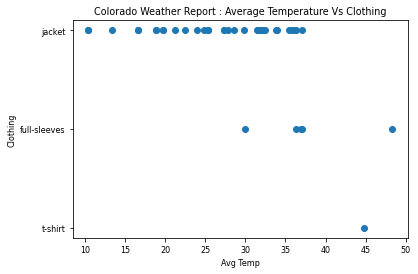

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.Avg_Temperature, df.clothing)
plt.title(' Colorado Weather Report : Average Temperature Vs Clothing ')
plt.xlabel('Avg Temp')
plt.ylabel('Clothing')
plt.show()

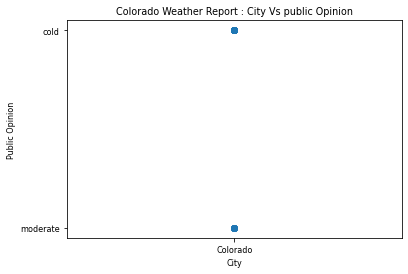

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.City, df.public_opinion)
plt.title(' Colorado Weather Report : City Vs public Opinion ')
plt.xlabel('City')
plt.ylabel('Public Opinion')
plt.show()

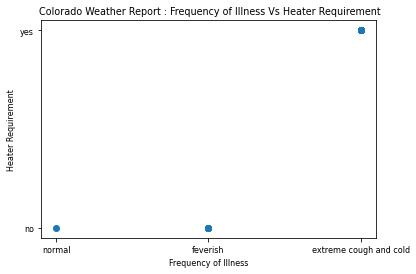

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.frequency_illness, df.heater_req)
plt.title(' Colorado Weather Report : Frequency of Illness Vs Heater Requirement')
plt.xlabel('Frequency of Illness')
plt.ylabel('Heater Requirement')
plt.show()

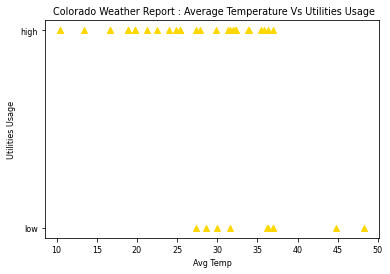

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.Avg_Temperature, df.gas_electricity_usage, color='gold', marker= '^')
plt.title(' Colorado Weather Report : Average Temperature Vs Utilities Usage')
plt.xlabel('Avg Temp')
plt.ylabel('Utilities Usage')
plt.show()

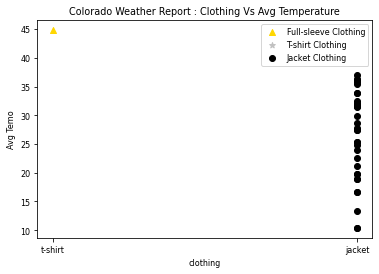

In [ ]:
df_fullsleeve = df[df['clothing'] == 't-shirt']
df_tshirt = df[df['clothing'] == 'full-sleeve']
df_jacket = df[df['clothing'] == 'jacket']

plt.scatter(df_fullsleeve.clothing, df_fullsleeve.Avg_Temperature, label='Full-sleeve Clothing', color='gold', marker= '^')
plt.scatter(df_tshirt.clothing, df_tshirt.Avg_Temperature, label='T-shirt Clothing', color='silver', marker= '*')
plt.scatter(df_jacket.clothing, df_jacket.Avg_Temperature, label='Jacket Clothing', color='black', marker= 'o')
plt.title('Colorado Weather Report : Clothing Vs Avg Temperature')
plt.xlabel('clothing')
plt.ylabel('Avg Temo')
plt.legend()
plt.show()

In [ ]:
# y = mx + b
# y = slope(x) + intercept

from scipy import stats

print(stats.linregress(df.Avg_Temperature, df.Avg_Temperature))

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)


LinregressResult(slope=0.8999451950341932, intercept=30.24640789191509, rvalue=0.6712325724163122, pvalue=4.9016314782176724e-05, stderr=0.1878135239113819, intercept_stderr=10.767957171918974)


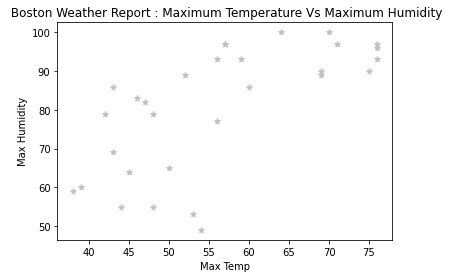

In [ ]:
# y = mx + b
# y = slope(x) + intercept

from scipy import stats

print(stats.linregress(df.Max_Temperature, df.Max_Humidity))
plt.scatter(df.Max_Temperature, df.Max_Humidity, color='silver', marker= '*')
plt.title(' Colorado Weather Report : Maximum Temperature Vs Maximum Humidity')
plt.xlabel('Max Temp')
plt.ylabel('Max Humidity')
plt.show()

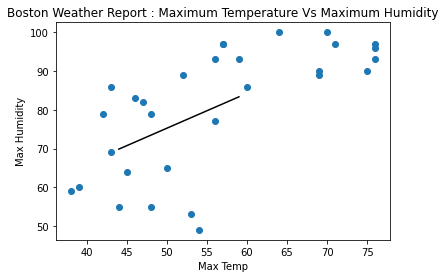

In [ ]:
# y = mx + b
# y = slope(x) + intercept

m, b, r, p, err = stats.linregress(df.Max_Temperature, df.Max_Humidity)
x = range(44, 60)
y = m * x + b
plt.plot(x, y, color='black')
plt.scatter(df.Max_Temperature, df.Max_Humidity)
plt.title('Colorado Weather Report : Maximum Temperature Vs Maximum Humidity')
plt.xlabel('Max Temp')
plt.ylabel('Max Humidity')
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model = ols(formula='Max_Temperature~Max_Humidity', data=df).fit()

white_test = het_white(model.resid, model.model.exog)
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p', 'F stat', 'F stat p'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = breuschpagan_test

output_df


,LM stat,LM p,F stat,F stat p
White,0.200923,0.904420,0.091025,0.913274
Breusch-Pagan,0.192211,0.661083,0.180553,0.674146


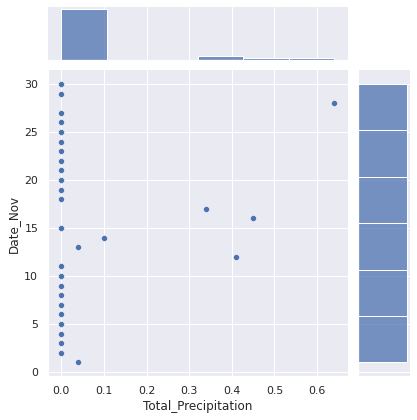

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x= "Total_Precipitation", y= "Date_Nov", data=df)


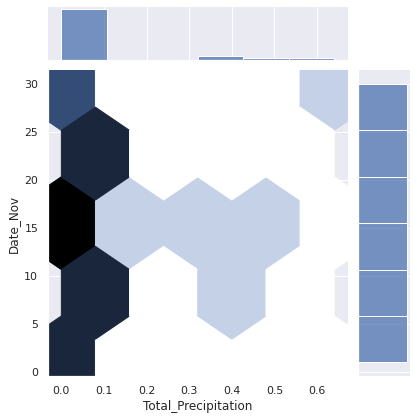

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x= "Total_Precipitation", y= "Date_Nov", data=df, kind= 'hex');

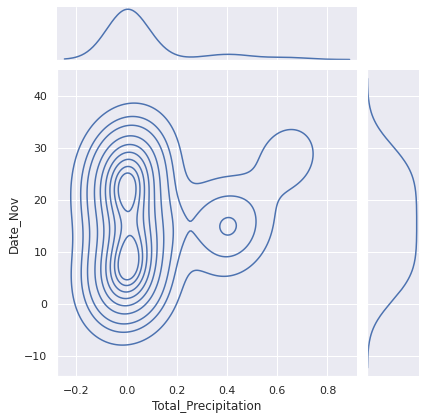

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x= "Total_Precipitation", y= "Date_Nov", data=df, kind= 'kde');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


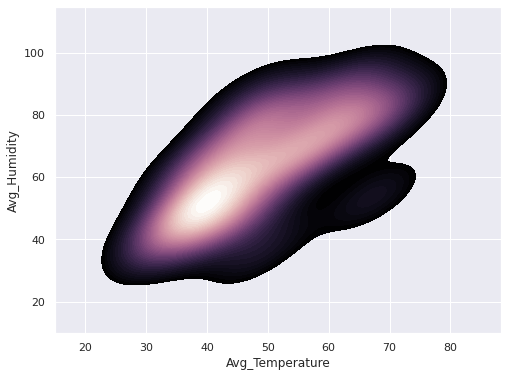

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.Avg_Temperature,df.Avg_Humidity, cmap=cmap, n_levels=60, shade=True)

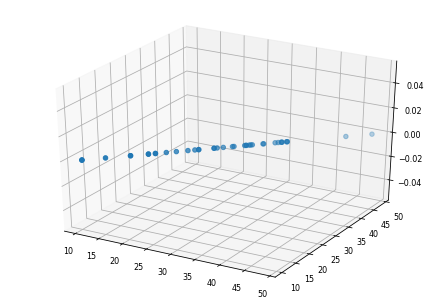

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

font = {'size': 8}
plt.rc('font', **font)

fig = plt.figure()
three_d_plot = Axes3D(fig)
three_d_plot.scatter(df.Avg_Temperature,df.Avg_Temperature)
plt.show()